# Exercícios - Cap 3
## Conceptual

1. 

Para cada meio de publicidade, o p-value testa a hipótese nula de que **não há associação estatisticamente significativa entre o investimento naquele meio e as vendas**, mantendo os demais constantes:

- **TV**  
  **H₀:** Gastos com publicidade em TV não estão associados às vendas.  
  **H₁:** Gastos com publicidade em TV estão associados às vendas.

- **Radio**  
  **H₀:** Gastos com publicidade em rádio não estão associados às vendas.  
  **H₁:** Gastos com publicidade em rádio estão associados às vendas.

- **Newspaper**  
  **H₀:** Gastos com publicidade em jornais não estão associados às vendas.  
  **H₁:** Gastos com publicidade em jornais estão associados às vendas.

#### Conclusões com base nos p-values

- **TV:** O p-value é extremamente pequeno, indicando forte evidência contra a hipótese nula.  
  **Conclusão:** Há uma associação estatisticamente significativa entre gastos em TV e vendas.

- **Radio:** O p-value também é muito pequeno.  
  **Conclusão:** Há uma associação estatisticamente significativa entre gastos em rádio e vendas.

- **Newspaper:** O p-value é elevado.  
  **Conclusão:** Não há evidência estatística suficiente para afirmar que gastos em jornais estejam associados às vendas.

2. 



3.

INTERCEPT      - 50

X1 = GPA       - 20

X2 = IQ        - 0.07

X3 = LEVEL     - 35

X4 = GPA:IQ    - 0.01

X5 = GPA:LEVEL - -10

a.) 


b.) 

Y = 50 + 4*20 + 110*0.07 + 1*35 + 4*110*0.01 + 4*1*(-10) = 137.1

c.) Falso, para afirmar sobre evidência ou não da interação é necessário avaliar o p-valor da preditora e não seu coeficiente. Qualquer feature utilizando IQ nesse caso terá um coeficiente menor simplesmente porque a feature IQ está em uma escala maior do que as outras.

4. 

a. e b.) O RSS definitivamente será menor, mas isso não significa que o modelo como um todo esteja performando bem. Isso é um caso bem claro de overfitting e enquanto o RSS do treino será menor, muito provavelmente o modelo cúbico não irá generalizar tão bem quanto um modelo linear mais simples, isso tudo tendo em vista que a relação verdadeira de X e Y é linear.

c. e d.) Nesse caso é necessário verificar, o RSS de treino sempre será menor conforme os graus polinomiais aumentarem, mas o RSS de teste irá performar melhor com cada modelo dependendo da verdadeira natureza da relação de Y e X.

5.



## Applied

### 8.

In [49]:
# data
import pandas as pd
import numpy as np

# stats
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

# viz
import matplotlib.pyplot as plt
import seaborn as sb

# ISLP
from ISLP import load_data

In [50]:
df = pd.read_csv(r"../data/Auto.csv")
df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce") # -> Forçando conversão, base conhecida com um erro
df = df.dropna()
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [51]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [52]:
# a.)
X, y = df["horsepower"], df["mpg"]
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 22 Jan 2026   Prob (F-statistic):           7.03e-81
Time:                        20:10:12   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

In [53]:
X_new = pd.DataFrame({"horsepower": [98]})
X_new = sm.add_constant(X_new,  has_constant="add")
y_pred = model.get_prediction(X_new)
print(f"Valor predito: {y_pred.predicted[0]}")
print(f"Intervalo de confiança: {y_pred.conf_int()}")
print(f"Intervalo de predição: {y_pred.conf_int(obs=True)}")

Valor predito: 24.467077152512424
Intervalo de confiança: [[23.97307896 24.96107534]]
Intervalo de predição: [[14.80939607 34.12475823]]


Existe relação da preditora com a resposta devido a F-statistic alto e p-valor da preditora baixo, a relação é de 0.15 em mpg para cada unidade de horsepower, a relação é negativa.



/tmp/ipykernel_4168/4037567771.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_plot = model.params[0] + model.params[1] * x_plot


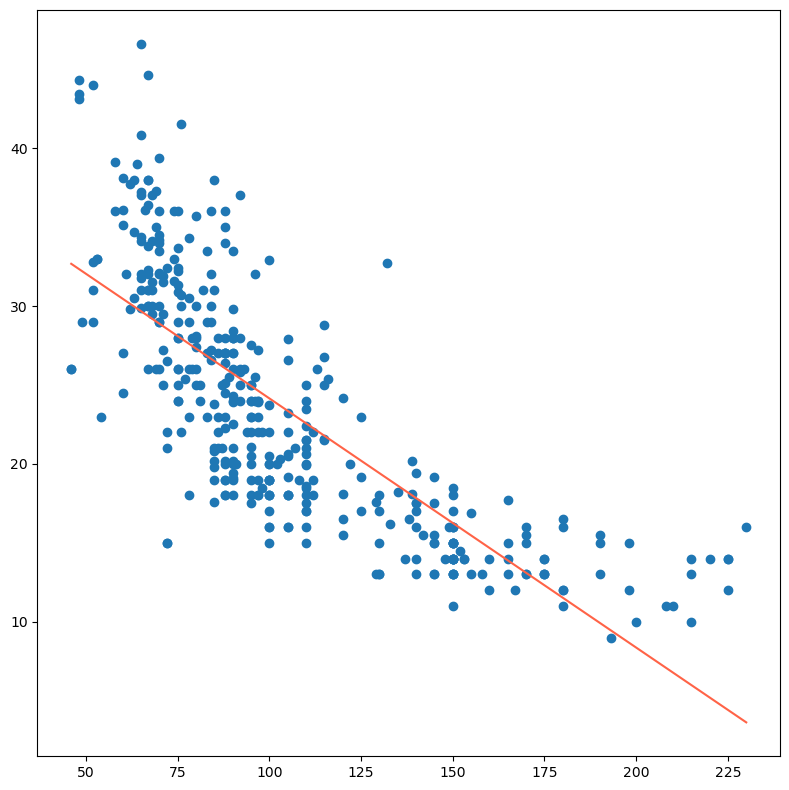

In [54]:
# b.)
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(df["horsepower"], df["mpg"])

x_plot = np.linspace(X.min(), X.max(), 100)
y_plot = model.params[0] + model.params[1] * x_plot

plt.plot(x_plot, y_plot, color="tomato")

plt.tight_layout()
plt.show()

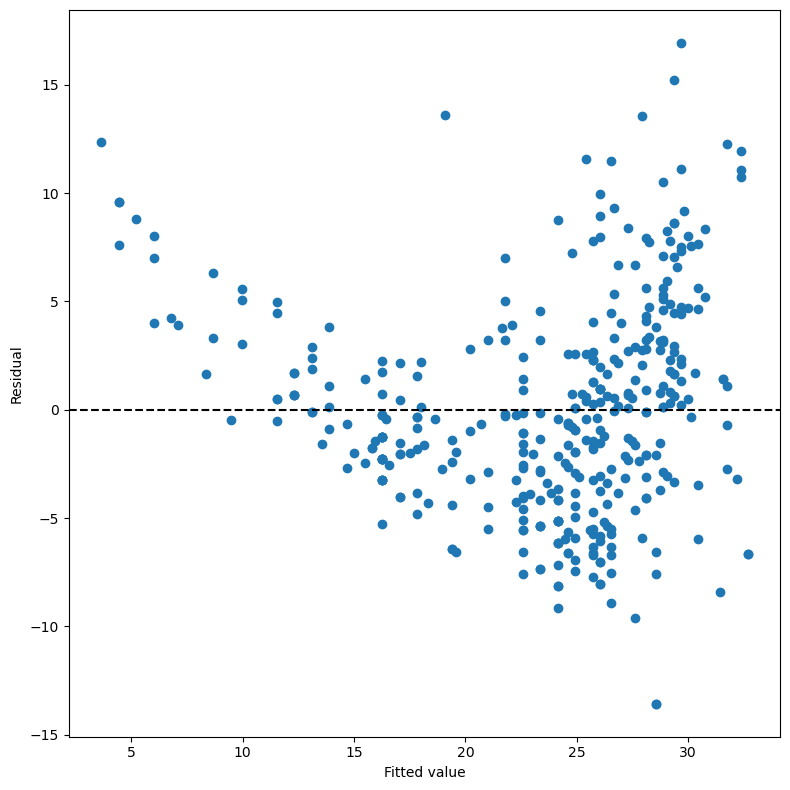

In [55]:
# c.) 

# plotando gráfico de resíduos
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(model.fittedvalues, model.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls= '--')

plt.tight_layout()
plt.show()

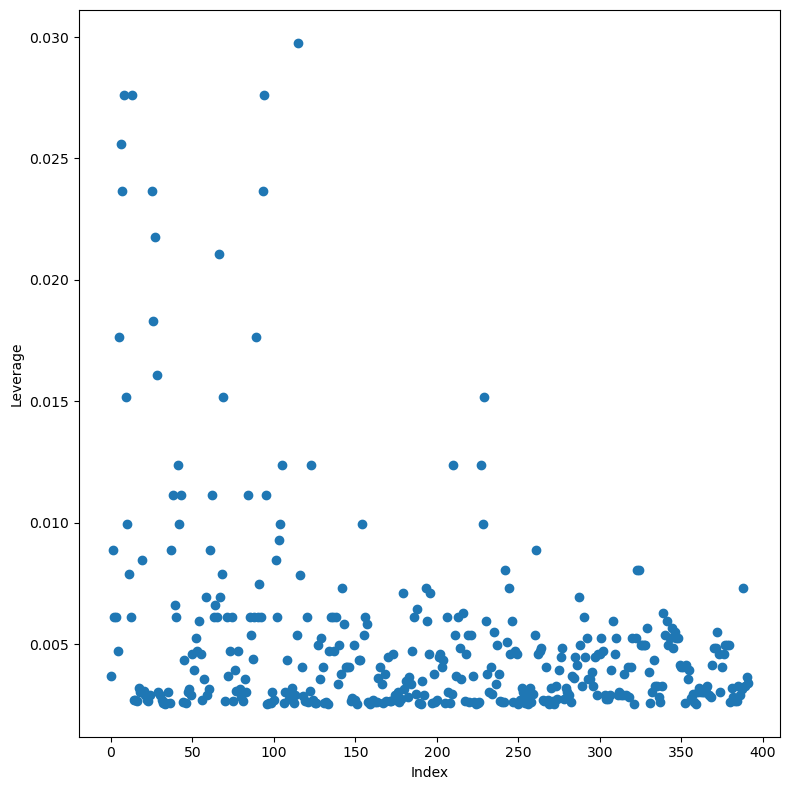

In [56]:
# Verificando pontos de alavanca
infl = model.get_influence()
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

plt.tight_layout()
plt.show()

Pelos gráficos de diagnóstico existe tanto variação na variância dos resíduos, heterocedasticidade, quanto temos alguns pontos de alavanca que podem exercer influência desigual no modelo.

### 9.) 

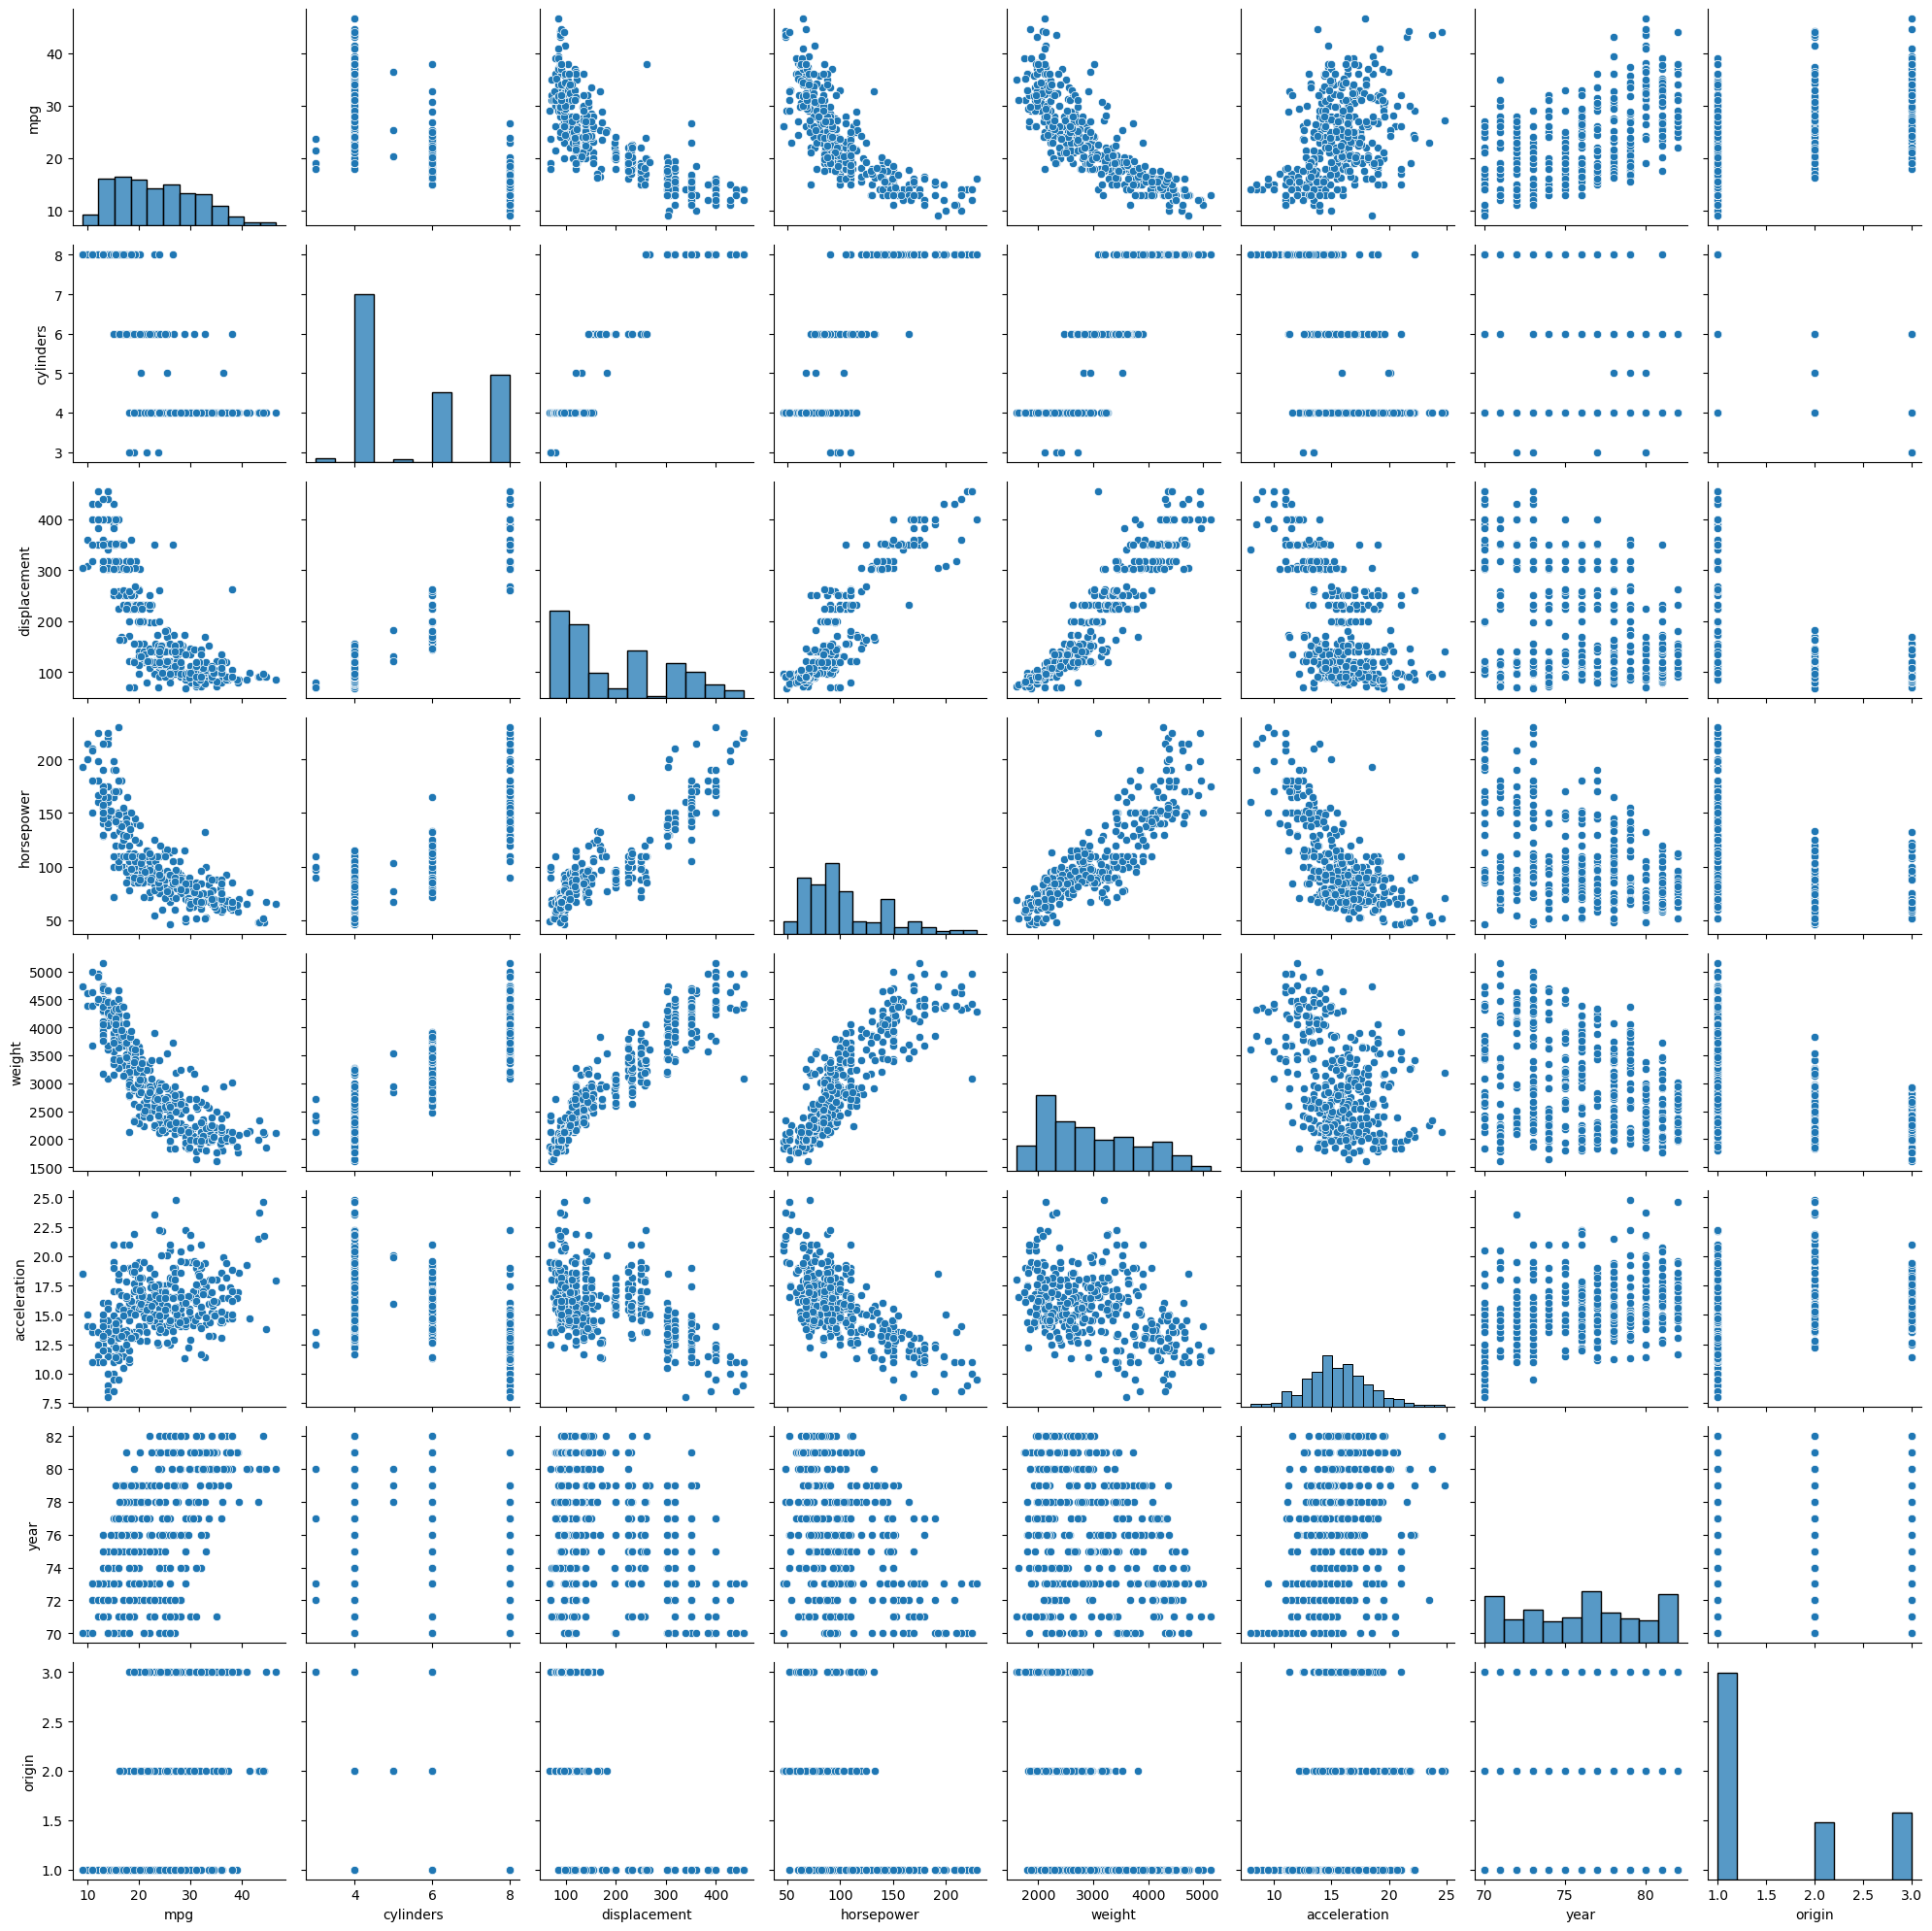

In [57]:
# a.)
sb.pairplot(df)
plt.tight_layout()
plt.show()

In [58]:
# b.)
df.drop(["name"], axis=1).corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [59]:
# c.) 
X, y = df.drop(["name", "mpg"], axis=1), df["mpg"]
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 22 Jan 2026   Prob (F-statistic):          2.04e-139
Time:                        20:10:16   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

obs: origin é categórico, deveria ser analisado utilizando dummy variables

i) F-statistic alto, indica que há evidência estátistica que existe relação entre os preditores e a variável resposta.

ii) Todos os preditores excluindo {cylinders, acceleration, horsepower}

iii) O coeficiente de year indica que há um aumento linear de 0.75 mpg para cada aumento de uma unidade de year.

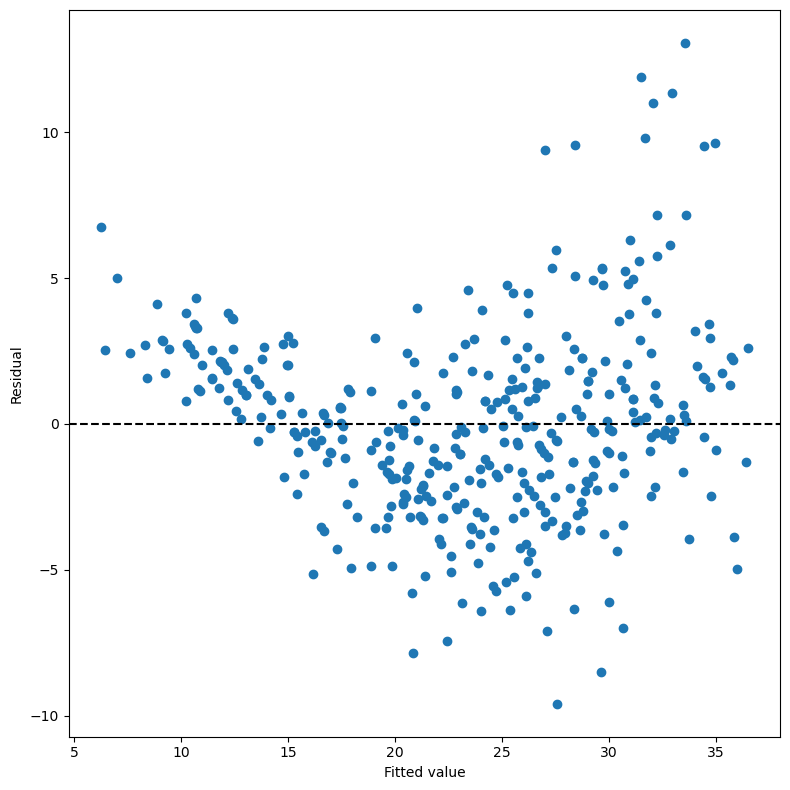

In [60]:
# d.)

# plotando gráfico de resíduos
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(model.fittedvalues, model.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls= '--')

plt.tight_layout()
plt.show()

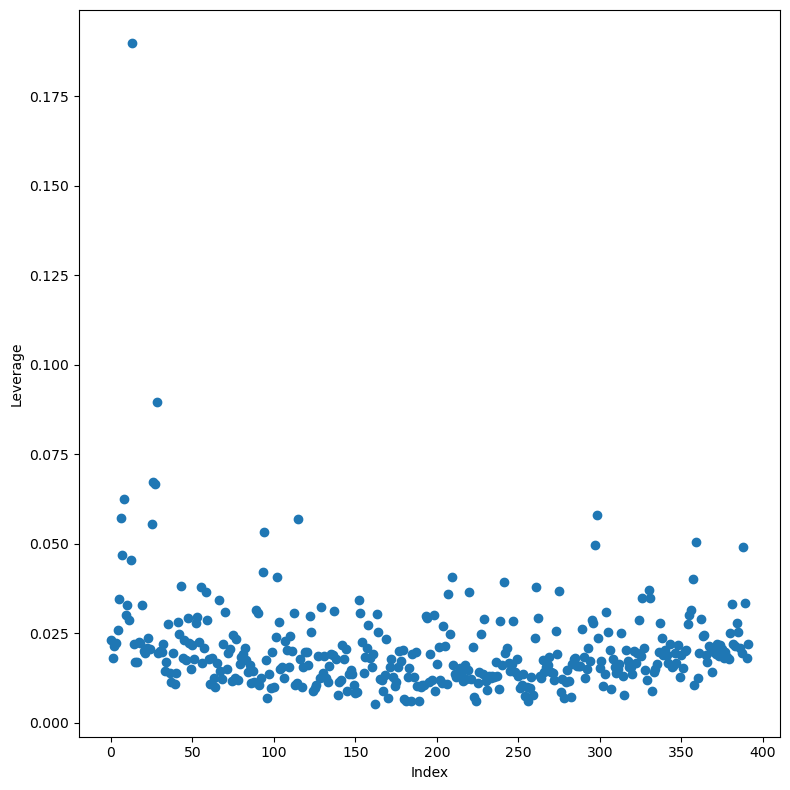

In [61]:
# Verificando pontos de alavanca
infl = model.get_influence()
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

plt.tight_layout()
plt.show()

O modelo mais completo ainda apresenta heterocedasticidade, entretanto os pontos de alavanca diminuíram, tendo apenas um ponto que apresenta influência desigual no modelo.

In [62]:
# e.) 

X, y = df.drop(["name", "mpg", "cylinders", "displacement", "acceleration"], axis=1), df["mpg"]

X = X.assign(
    weight_horsepower = X["weight"] * X["horsepower"]
)

model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     477.5
Date:                Thu, 22 Jan 2026   Prob (F-statistic):          8.32e-163
Time:                        20:10:16   Log-Likelihood:                -974.68
No. Observations:                 392   AIC:                             1961.
Df Residuals:                     386   BIC:                             1985.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.8145      3.96

Depois de alguns testes foi verificado que conseguimos remover algumas features sem perda relevante no R2, além disso a interação de weight e horsepower foi capaz de aumentar de forma significativa o R2 e R2 ajustado, além de possuir p-valor extremamente baixo, dessa forma há evidências de que essa relação é estatisticamente significativa.

In [63]:
# e.) 

X, y = df.drop(["name", "mpg", "cylinders", "displacement", "acceleration"], axis=1), df["mpg"]

X = X.assign(
    weight_2 = X["weight"]**2,
    horsepower_2 = X["horsepower"]**2
)

model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     403.0
Date:                Thu, 22 Jan 2026   Prob (F-statistic):          1.53e-162
Time:                        20:10:16   Log-Likelihood:                -972.10
No. Observations:                 392   AIC:                             1958.
Df Residuals:                     385   BIC:                             1986.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.6018      4.082      0.637   

O uso de variações polinomiais foi capaz de aumentar o valor de R2 e R2 ajustado, além disso com a adição dessas features a importância da feature de relação diminui drasticamente.

### 10.)

In [64]:
# a.)
df = load_data("Carseats")

df.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes


In [65]:
df.dtypes

Sales           float64
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc      category
Age               int64
Education         int64
Urban          category
US             category
dtype: object

In [66]:
df.Urban.value_counts()

Urban
Yes    282
No     118
Name: count, dtype: int64

In [67]:
df.US.value_counts()

US
Yes    258
No     142
Name: count, dtype: int64

In [68]:
cols = ["Urban", "US"]
df[cols] = df[cols].apply(lambda col: col.map({'Yes': 1, 'No': 0}))

In [69]:
X, y = df[["Price", "Urban", "US"]], df["Sales"]
model1 = sm.OLS(y, sm.add_constant(X)).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Thu, 22 Jan 2026   Prob (F-statistic):           2.39e-23
Time:                        20:10:16   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

b.) 

Cada aumento em uma unidade em price representa uma diminuição de 0.0545 em Sales.

Para público igual a Urban temos uma uma diminuição em Sales de 0.0219 comparado com não Urban.

Para público igual a US temos uma uma aumento em Sales de 1.2006 comparado com não US.

c.) 



d.)

Analisando a estátistica t e o p-valor de cada variável temos evidências de que apenas a variável Urban é não significativa.

In [70]:
# e.)

X, y = df[["Price", "US"]], df["Sales"]
model2 = sm.OLS(y, sm.add_constant(X)).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Thu, 22 Jan 2026   Prob (F-statistic):           2.66e-24
Time:                        20:10:16   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.0

Nenhuma diminuição em R2 e aumento de R2 ajustado, retirar a variável foi melhor para o modelo.

f.) Ambos os modelos atingem um valor de R2 ajustado bem baixo, de 0.235. Ou seja, muito da variância encontrada em Sales ainda não é explicada pelo modelo.

In [71]:
# g.)
 
model2.conf_int()   

,0,1
const,11.79032,14.271265
Price,-0.06476,-0.044195
US,0.69152,1.707766


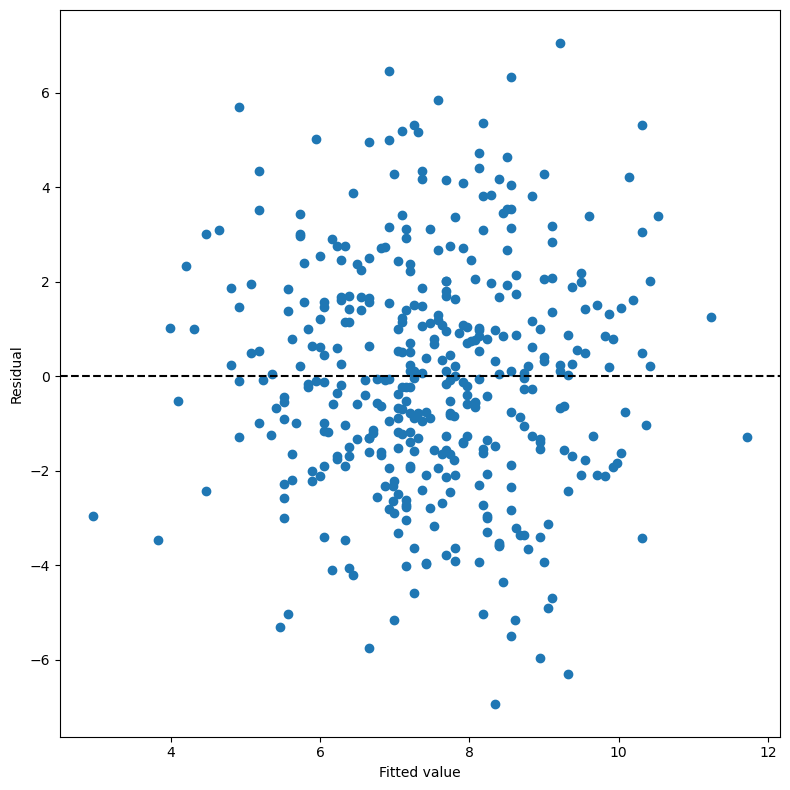

In [72]:
# plotando gráfico de resíduos
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(model2.fittedvalues, model2.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls= '--')

plt.tight_layout()
plt.show()

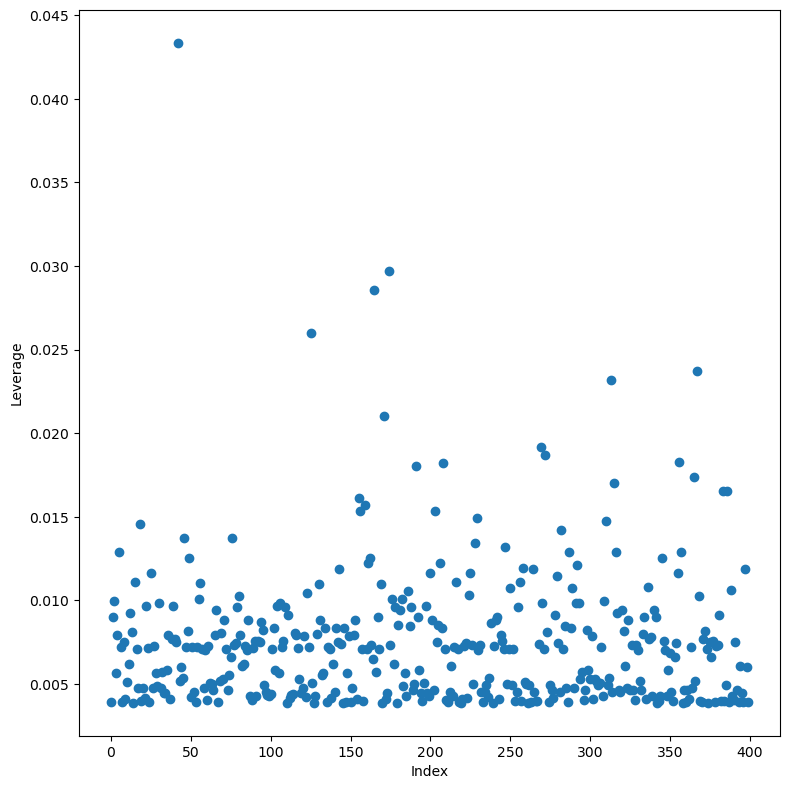

In [73]:
# Verificando pontos de alavanca
infl = model2.get_influence()
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

plt.tight_layout()
plt.show()

Não há evidências de outliers, no entanto há evidência de pelo menos um ponto de alavanca nos dados.

### 11.)

In [74]:
rng = np.random.default_rng(1)
x = rng.normal(size=100) 
y = 2 * x + rng.normal(size=100)

In [75]:
# a.)
model = sm.OLS(x, y).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Thu, 22 Jan 2026   Prob (F-statistic):                    6.23e-31
Time:                        20:10:16   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [76]:
# b.)
model = sm.OLS(y, x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Thu, 22 Jan 2026   Prob (F-statistic):                    6.23e-31
Time:                        20:10:16   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c.) 

R2, R2 ajustado, estatística F, t e p-valor se mantém independente do modelo.

Coeficiente, erro padrão são mutáveis

### 12.)

### 13.)

In [77]:
rng = np.random.default_rng(1)

In [78]:
# a.)

x = rng.normal(loc=0.0, scale=1.0, size=100)

In [79]:
# b.) 

eps = rng.normal(loc=0.0, scale=0.25, size=100)

In [80]:
# c.)

y = -1 + (0.5 * x) + eps

y.shape[0]

100

y possui 100 linhas, valor de B0 é -1 e B1 é 0.5

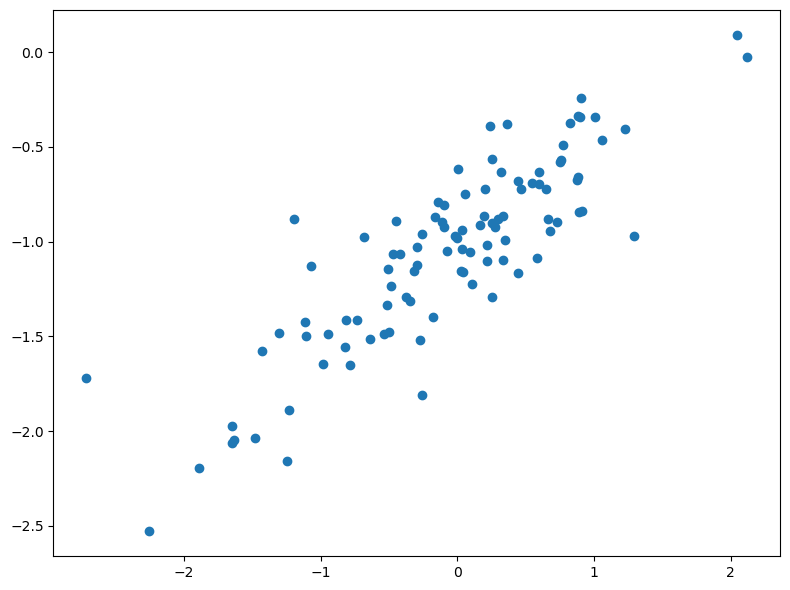

In [81]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(x, y)

plt.tight_layout()
plt.show()

Existe relação linear positiva entre x e y

In [82]:
# e.)

model = sm.OLS(y, sm.add_constant(x)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Thu, 22 Jan 2026   Prob (F-statistic):           1.74e-30
Time:                        20:10:17   Log-Likelihood:                -2.4306
No. Observations:                 100   AIC:                             8.861
Df Residuals:                      98   BIC:                             14.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0190      0.025    -40.537      0.0

O elevado valor de R2 indica que o modelo linear explica grande parte da variabilidade da variável resposta. Além disso, como o processo gerador dos dados é linear e o modelo está corretamente especificado, os estimadores de mínimos quadrados são não viesados e consistentes, resultando em coeficientes estimados próximos dos valores reais.

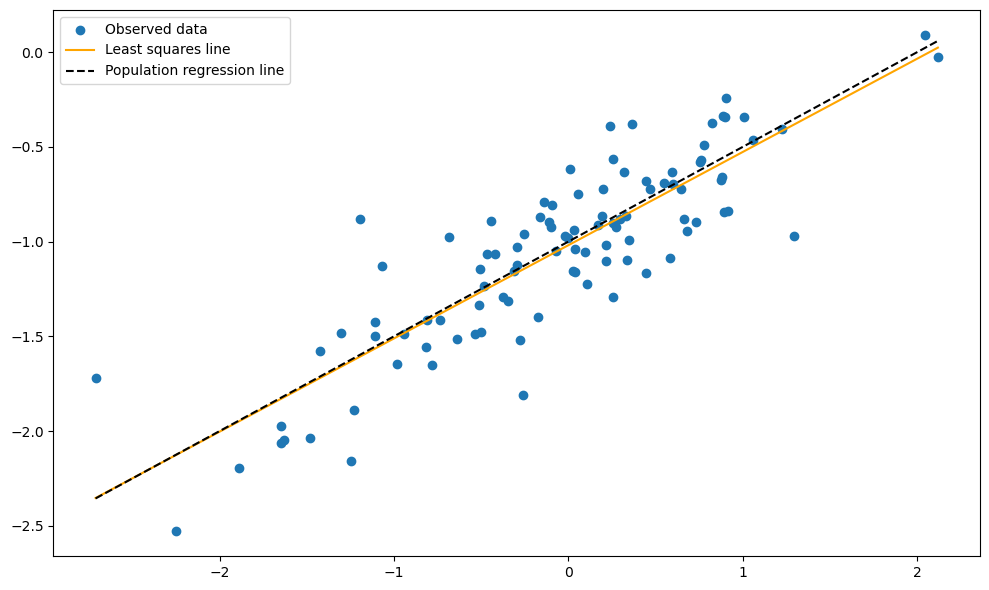

In [83]:
# f)
x_grid = np.linspace(x.min(), x.max(), 100)

y_pred = model.predict(sm.add_constant(x_grid))

y_true = -1 + 0.5 * x_grid


fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(x, y, label="Observed data")
ax.plot(x_grid, y_pred, color="orange", label="Least squares line")
ax.plot(x_grid, y_true, color="black", linestyle="--", label="Population regression line")

ax.legend()

plt.tight_layout()
plt.show()

In [84]:
# g.) 
x_poly = x.copy()
x_poly = pd.DataFrame({
    "x": x,
    "x2": x**2
})

model = sm.OLS(y, sm.add_constant(x_poly)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     138.6
Date:                Thu, 22 Jan 2026   Prob (F-statistic):           3.66e-29
Time:                        20:10:17   Log-Likelihood:                -2.4293
No. Observations:                 100   AIC:                             10.86
Df Residuals:                      97   BIC:                             18.67
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0182      0.030    -34.186      0.0

Há evicências de que a adição do termo polinomial ao quadrado ao modelo de regressão linear é não significativo, podemos verificar isso pelo alto p_valor dessa nova feature, pelo fato de R2 não ter aumentado e R2 ajustado ter diminuído.

j.) Quanto menor o ruído do dataset melhor o modelo vai estimar os coeficientes, maiores serão os valores de R2 e R2 ajustado e mais estreito será o intervalo de confiança da estimação dos coeficientes.

### 14.)

In [85]:
# a.)
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

Equação do modelo: yi​ = β0​ + β1​ * x1i ​+ β2 ​* x2i ​+ εi

​​Coeficientes: 
- β0 = 2
- β1 = 2
- β2 = 0.3

In [86]:
# b.)
print(f"Corr entre x1 e x2: {np.corrcoef(x1, x2)[0, 1]:.3f}")

Corr entre x1 e x2: 0.772


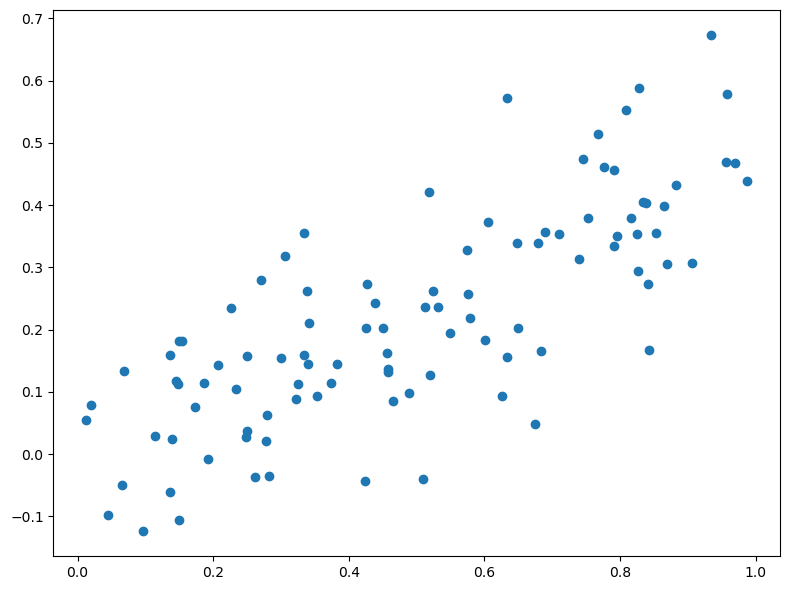

In [87]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(x1, x2)

plt.tight_layout()
plt.show()

In [88]:
# c.)

X = pd.DataFrame({
    "x1": x1,
    "x2": x2
})

model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Thu, 22 Jan 2026   Prob (F-statistic):           5.76e-08
Time:                        20:10:17   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.0

Os dois primeiros coeficientes estão próximos do valor real, o último coeficiente está mais distante do valor real.

Pelos p-valores temos evidências para rejeitar que B1 = 0, entretanto não temos evidências para rejeitar B2 = 0

In [89]:
# d.)

model = sm.OLS(y, sm.add_constant(x1)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Thu, 22 Jan 2026   Prob (F-statistic):           1.37e-08
Time:                        20:10:17   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9371      0.189     10.242      0.0

Pelo p-valor é possível rejeitar a hipótese de que B1 = 0

In [90]:
# e.)

model = sm.OLS(y, sm.add_constant(x2)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Thu, 22 Jan 2026   Prob (F-statistic):           7.43e-07
Time:                        20:10:17   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3239      0.154     15.124      0.0

Pelo p-valor é possível rejeitar a hipótese de que B1 = 0

f.) Aparentemente os resultados obtidos se contradizem, mas esse é um erro de interpretação do modelo.

No primeiro modelo x2 não é significativa, pois dado a existência de x1, x2 não contribui com a variância marginal do modelo. 

No segundo modelo, com x2 isoladamente, temos que a feature é significativa, isso não contradiz o primeiro modelo. O que temos na verdade é que X2 possui correlação com Y, entretanto grande parte dessa relação já é explicada pela variável X1. 

OBS: Isso está ligado a correlação existente entre x1 e x2, que verificamos na questão a.) que é bem alta.

In [91]:
# g.)

x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

X = pd.DataFrame({
    "x1": x1,
    "x2": x2
})

In [92]:
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Thu, 22 Jan 2026   Prob (F-statistic):           4.60e-08
Time:                        20:10:17   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0618      0.192     10.720      0.0

In [93]:
model = sm.OLS(y, sm.add_constant(x1)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Thu, 22 Jan 2026   Prob (F-statistic):           9.23e-07
Time:                        20:10:17   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0739      0.201     10.310      0.0

In [94]:
model = sm.OLS(y, sm.add_constant(x2)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Thu, 22 Jan 2026   Prob (F-statistic):           3.13e-08
Time:                        20:10:17   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2840      0.151     15.088      0.0

a informação faz com que x1 possua menos informação marginal do que x2, subvertendo a variável com maior informação para o modelo.

### 15.)

In [158]:
# a.)
df = load_data("Boston")

cols = df.drop("crim", axis=1).columns.to_list()

for col in cols:
    model = sm.OLS(df["crim"], sm.add_constant(df[col])).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Thu, 22 Jan 2026   Prob (F-statistic):           5.51e-06
Time:                        21:07:13   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4537      0.417     10.675      0.0

Podemos perceber que há um alto R2 para as variáveis [rad, tax, lstat]

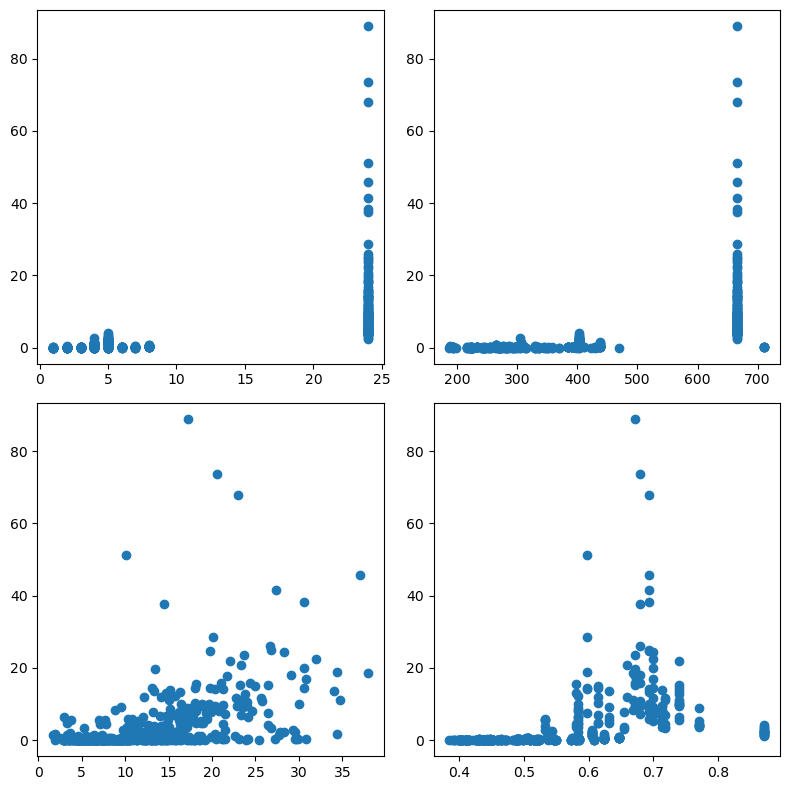

In [159]:
y = df["crim"]

fig, ax = plt.subplots(2, 2, figsize=(8, 8))

ax[0,0].scatter(df["rad"], y)
ax[0,1].scatter(df["tax"], y)
ax[1,0].scatter(df["lstat"], y)
ax[1,1].scatter(df["nox"], y)

plt.tight_layout()
plt.show()

In [160]:
# b.)
y = df["crim"]
X = df.drop("crim", axis=1)

model_total = sm.OLS(y, sm.add_constant(X)).fit()
print(model_total.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Thu, 22 Jan 2026   Prob (F-statistic):           2.03e-56
Time:                        21:07:19   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7784      7.082      1.946      0.0

R2 ainda baixo, F-statistic bem baixo, muitas variáveis com alto p-valor, dentre elas temos [const, indus, chas, nox, rm, age, tax, ptratio, lstat].

In [163]:
# c.)
params = []

for col in cols:
    model = sm.OLS(df["crim"], sm.add_constant(df[col])).fit()
    k = model.params.iloc[1]
    params.append(k)

params = np.array(params)

params_total = model_total.params.iloc[1:].values

df_var = pd.DataFrame({
    "feature": cols,
    "params_1": params,
    "params_2": params_total
})

df_var["diff"] = abs(df_var["params_1"] - df_var["params_2"])
df_var.sort_values(by="diff", ascending=False)

,feature,params_1,params_2,diff
3,nox,31.248531,-9.957587,41.206118
4,rm,-2.684051,0.628911,3.312962
9,ptratio,1.151983,-0.304073,1.456056
2,chas,-1.892777,-0.825378,1.067399
1,indus,0.509776,-0.058350,0.568126
6,dis,-1.550902,-1.012247,0.538655
10,lstat,0.548805,0.138801,0.410004
11,medv,-0.363160,-0.220056,0.143104
0,zn,-0.073935,0.045710,0.119645
5,age,0.107786,-0.000848,0.108635


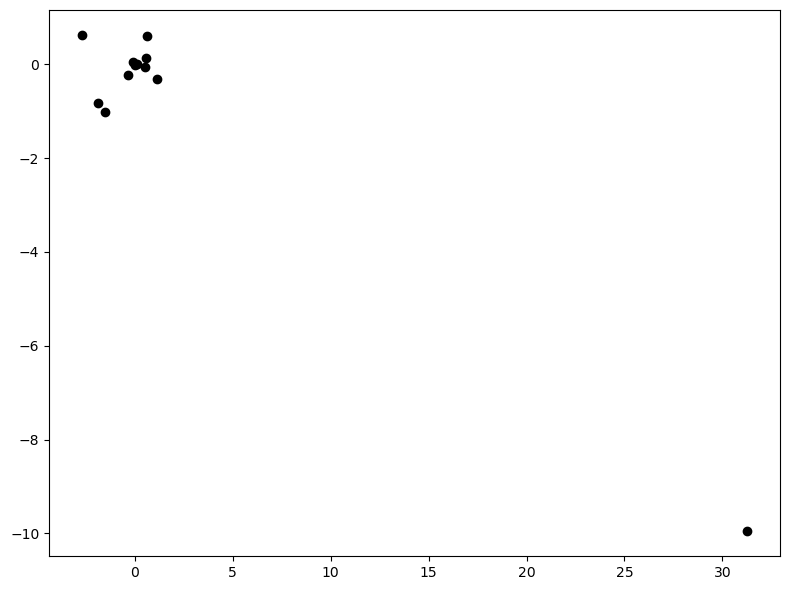

In [164]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(df_var["params_1"], df_var["params_2"], color="k")

plt.tight_layout()
plt.show()

In [165]:
# d.)

for col in cols:
    y = df["crim"]
    x = df[col]
    X = pd.DataFrame({
        f"{col}1": x,
        f"{col}2": x**2,
        f"{col}3": x**3,
    })

    model = sm.OLS(y, sm.add_constant(X)).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Thu, 22 Jan 2026   Prob (F-statistic):           1.28e-06
Time:                        21:13:17   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8461      0.433     11.192      0.0

Sim, há evidência clara de associação não linear entre a variável resposta crim e vários preditores. Podemos afirmar isso devido ao p-valor baixo para as variáveis polinomiais feitas.